In [1]:
#!pip install pycaret --upgrade

In [2]:
#!pip install markupsafe==2.0.1

In [3]:
#!pip install jinja2

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/Training_set_advance.csv')
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,1,1,5327,DX6,27,26.722301,YES,RURAL,Stable,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,2,32,12157,DX2 DX3,32,18.622978,YES,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0
2,3,3,9024,dx2,45,25.846438,NO,URBAN,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1
3,4,50,7574,DX6,39,23.864199,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1
4,5,20,10218,DX2,21,18.959904,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30006,33010,0,12511,NaN,142,1.570100,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
30007,33011,0,12512,NaN,132,1.989600,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
30008,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
30009,33013,0,12514,NaN,121,1.089300,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [6]:
# Summary statistics for numerical columns
df.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,30011.000000
mean,16524.114391,26.428343,6248.331345,33.252141,23.454979,0.896119,0.138108,0.184145,0.084071,0.395502,0.053756,0.000529,1.752230,0.632368
std,9522.663465,15.048223,3607.907562,19.555212,3.798224,0.305111,0.345020,0.387609,0.277499,0.488967,0.225539,0.022989,0.770092,0.482168
min,1.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8279.500000,13.000000,3142.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16533.000000,26.000000,6227.000000,33.000000,23.392495,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24775.000000,39.000000,9375.500000,50.000000,26.774765,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [7]:
# Data Structure of the data set
df.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [8]:
# Qualitiative Cleaning 
df = df[df.Patient_Smoker != 'Cannot say']

In [9]:
# Selecting only valid variables ignoring noise variables
cols = ['Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year']


In [10]:
# Setting the dataframe to contain only valid columns
df = df[cols]
df.columns

Index(['Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [11]:
df.isnull().sum()

Treated_with_drugs             4
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                           1642
B                           1642
C                           1642
D                           1642
E                           1642
F                           1642
Z                           1642
Number_of_prev_cond         1642
Survived_1_year                0
dtype: int64

In [12]:
# Replacing missing values with a hard coded value like zero (eg 1 for yes, 0 for none)
df['A'] = df['A'].fillna(0)
df['B'] = df['B'].fillna(0)
df['C'] = df['C'].fillna(0)
df['D'] = df['D'].fillna(0)
df['E'] = df['E'].fillna(0)
df['F'] = df['F'].fillna(0)
df['Z'] = df['Z'].fillna(0)

df['Number_of_prev_cond'] = df['Number_of_prev_cond'].fillna((df['Number_of_prev_cond'].median()))
df= df.dropna(subset = ['Treated_with_drugs'])

In [13]:
df.isnull().sum()

Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
Survived_1_year             0
dtype: int64

In [14]:
df['Treated_with_drugs'] = df['Treated_with_drugs'].str.upper()
df['Treated_with_drugs'] = df['Treated_with_drugs'].str.strip()

In [15]:
df.loc[df['Patient_Smoker']=="NO",'Patient_Smoker']='NO'
df.loc[df['Patient_Smoker']=="YES",'Patient_Smoker']='YES'
df.loc[df['Patient_Smoker']=="YESS",'Patient_Smoker']='YES'
df.loc[df['Patient_Smoker']=='YESS ','Patient_Smoker']='YES'
df['Patient_Smoker'] = df['Patient_Smoker'].str.strip()

In [16]:
df['Drug_1'] = df['Treated_with_drugs'].str.split(' ', expand=True)[0]
df['Drug_2'] = df['Treated_with_drugs'].str.split(' ', expand=True)[1]
df['Drug_3'] = df['Treated_with_drugs'].str.split(' ', expand=True)[2]
df['Drug_4'] = df['Treated_with_drugs'].str.split(' ', expand=True)[3]
df['Drug_5'] = df['Treated_with_drugs'].str.split(' ', expand=True)[4]

In [17]:
df=df.drop(columns=['Treated_with_drugs'])
df.head()

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Drug_1,Drug_2,Drug_3,Drug_4,Drug_5
0,27,26.722301,YES,RURAL,Stable,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,DX6,None,None,None,None
1,32,18.622978,YES,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0,DX2,DX3,None,None,None
2,45,25.846438,NO,URBAN,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1,DX2,None,None,None,None
3,39,23.864199,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,DX6,None,None,None,None
4,21,18.959904,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,DX2,None,None,None,None


In [18]:
# Setting Categorical columns
#cat_cols = ['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition']
cat_cols = ['Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z','Drug_1','Drug_2','Drug_3','Drug_4','Drug_5']

In [19]:
#To import all Classification related Pycaret libraries
import jinja2
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [38]:
# Setting up the classification ML experiment
classification_model_setup = setup(df,  target = 'Survived_1_year', categorical_features= cat_cols,  train_size = 0.7,session_id=123, normalize = True,normalize_method='minmax')

,Description,Value
0,session_id,123
1,Target,Survived_1_year
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29996, 19)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Patient_Smoker',
                                                            'Patient_Rural_Urban',
                                                            'Patient_mental_condition',
                                                            'A', 'B', 'C', 'D',
                                                            'E', 'F', 'Z',
                                                            'Drug_1', 'Drug_2',
                                                            'Drug_3', 'Drug_4',
                                                            'Drug_5'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
     

In [39]:
# Running the multiple algorithms
compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7969,0.8743,0.8830,0.8128,0.8464,0.5484,0.5526,1.865
lightgbm,Light Gradient Boosting Machine,0.7972,0.8742,0.8674,0.8223,0.8442,0.5543,0.5560,0.295
ada,Ada Boost Classifier,0.7778,0.8514,0.8472,0.8107,0.8285,0.5134,0.5145,0.622
rf,Random Forest Classifier,0.7633,0.8282,0.8377,0.7986,0.8177,0.4809,0.4821,1.969
knn,K Neighbors Classifier,0.7452,0.7876,0.8475,0.7725,0.8083,0.4312,0.4354,1.146
et,Extra Trees Classifier,0.7463,0.7746,0.8197,0.7885,0.8037,0.4457,0.4464,1.926
lr,Logistic Regression,0.7287,0.7820,0.8561,0.7507,0.7999,0.3842,0.3924,0.518
ridge,Ridge Classifier,0.7270,0.0000,0.8587,0.7478,0.7994,0.3784,0.3875,0.043
lda,Linear Discriminant Analysis,0.7269,0.7821,0.8534,0.7501,0.7984,0.3807,0.3885,0.118
svm,SVM - Linear Kernel,0.7161,0.0000,0.8387,0.7534,0.7877,0.3544,0.3771,0.129


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Creat Model

#### Light Gradient Boosting Machine Classifier

In [40]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7943,0.8725,0.8655,0.8199,0.8421,0.5476,0.5493
1,0.7910,0.8633,0.8678,0.8145,0.8403,0.5386,0.5409
2,0.8000,0.8813,0.8639,0.8278,0.8455,0.5624,0.5635
3,0.8052,0.8819,0.8699,0.8306,0.8498,0.5733,0.5745
4,0.7886,0.8720,0.8586,0.8169,0.8372,0.5361,0.5375
5,0.8057,0.8805,0.8714,0.8302,0.8503,0.5740,0.5754
6,0.8010,0.8708,0.8744,0.8225,0.8477,0.5614,0.5635
7,0.8004,0.8748,0.8669,0.8265,0.8462,0.5622,0.5635
8,0.7994,0.8853,0.8639,0.8272,0.8452,0.5609,0.5620


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


#### Gradient Boosting Classifier

In [23]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7929,0.8767,0.8783,0.8107,0.8431,0.5397,0.5435
1,0.7890,0.8605,0.8768,0.8071,0.8405,0.5307,0.5347
2,0.8038,0.8770,0.8820,0.8214,0.8506,0.5660,0.5690
3,0.8043,0.8847,0.8850,0.8202,0.8514,0.5662,0.5697
4,0.7957,0.8732,0.8782,0.8139,0.8448,0.5471,0.5505
5,0.8076,0.8826,0.8925,0.8198,0.8546,0.5720,0.5765
6,0.7929,0.8706,0.8895,0.8042,0.8447,0.5361,0.5423
7,0.7985,0.8772,0.8865,0.8125,0.8479,0.5510,0.5556
8,0.7994,0.8809,0.8744,0.8207,0.8467,0.5574,0.5598


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


#### Random Forest Classifier

In [24]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7657,0.8314,0.8400,0.8003,0.8196,0.4860,0.4871
1,0.7600,0.8224,0.8392,0.7939,0.8159,0.4720,0.4735
2,0.7714,0.8328,0.8368,0.8089,0.8226,0.5016,0.5022
3,0.7671,0.8322,0.8293,0.8081,0.8186,0.4938,0.4941
4,0.7571,0.8273,0.8301,0.7954,0.8124,0.4687,0.4695
5,0.7600,0.8283,0.8353,0.7958,0.8151,0.4738,0.4749
6,0.7619,0.8263,0.8444,0.7931,0.8179,0.4750,0.4770
7,0.7646,0.8215,0.8466,0.7952,0.8201,0.4808,0.4828
8,0.7747,0.8403,0.8406,0.8107,0.8254,0.5080,0.5087


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


#### Logistic Regression 

In [25]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7410,0.7923,0.8588,0.7625,0.8078,0.4150,0.4219
1,0.7229,0.7676,0.8482,0.7482,0.7951,0.3723,0.3793
2,0.7376,0.7962,0.8579,0.7591,0.8055,0.4070,0.4143
3,0.7448,0.7998,0.8714,0.7605,0.8122,0.4197,0.4292
4,0.7338,0.7875,0.8549,0.7565,0.8027,0.3984,0.4055
5,0.7281,0.7861,0.8684,0.7447,0.8018,0.3769,0.3884
6,0.7190,0.7628,0.8489,0.7437,0.7928,0.3623,0.3700
7,0.7170,0.7760,0.8436,0.7440,0.7907,0.3592,0.3660
8,0.7251,0.7863,0.8519,0.7488,0.7970,0.3766,0.3842


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## Tune a Model

#### Light Gradient Boosting Machine Classifier

In [26]:
tuned_lightgbm = tune_model(lightgbm, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7910,0.8744,0.8678,0.8145,0.8403,0.5386,0.5409
1,0.7895,0.8606,0.8655,0.8141,0.8390,0.5359,0.5380
2,0.8043,0.8776,0.8729,0.8275,0.8496,0.5700,0.5717
3,0.8067,0.8842,0.8767,0.8281,0.8517,0.5747,0.5766
4,0.7919,0.8740,0.8669,0.8160,0.8407,0.5415,0.5436
5,0.8043,0.8818,0.8752,0.8261,0.8499,0.5693,0.5713
6,0.7871,0.8698,0.8609,0.8138,0.8367,0.5318,0.5336
7,0.7994,0.8750,0.8699,0.8235,0.8461,0.5589,0.5607
8,0.8032,0.8819,0.8617,0.8335,0.8473,0.5709,0.5715


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


#### Gradient Boosting Classifier

In [27]:
tuned_gbc = tune_model(gbc, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7943,0.8712,0.8685,0.8181,0.8426,0.5466,0.5487
1,0.7919,0.8595,0.8693,0.8148,0.8411,0.5405,0.5429
2,0.8019,0.8734,0.8662,0.8288,0.8471,0.5664,0.5675
3,0.8038,0.8812,0.8571,0.8370,0.8470,0.5739,0.5742
4,0.7914,0.8636,0.8632,0.8177,0.8398,0.5416,0.5433
5,0.8024,0.8753,0.8602,0.8332,0.8465,0.5694,0.5700
6,0.7981,0.8711,0.8647,0.8250,0.8443,0.5575,0.5588
7,0.7966,0.8729,0.8759,0.8164,0.8451,0.5499,0.5528
8,0.8023,0.8797,0.8564,0.8357,0.8459,0.5703,0.5706


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


#### Random Forest Classifier

In [28]:
tuned_rf = tune_model(rf, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7771,0.8322,0.8708,0.7966,0.8320,0.5030,0.5074
1,0.7552,0.8072,0.8610,0.7769,0.8168,0.4510,0.4564
2,0.7771,0.8343,0.8707,0.7964,0.8319,0.5033,0.5077
3,0.7819,0.8463,0.8842,0.7946,0.8370,0.5103,0.5170
4,0.7638,0.8300,0.8541,0.7900,0.8208,0.4760,0.4791
5,0.7762,0.8364,0.8782,0.7913,0.8325,0.4981,0.5042
6,0.7619,0.8252,0.8744,0.7774,0.8231,0.4630,0.4705
7,0.7742,0.8293,0.8805,0.7880,0.8317,0.4919,0.4989
8,0.7732,0.8353,0.8541,0.8011,0.8268,0.4995,0.5016


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


#### Logistic Regression

In [29]:
lr = tune_model(lr, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7400,0.7919,0.8618,0.7601,0.8077,0.4111,0.4189
1,0.7205,0.7673,0.8505,0.7447,0.7941,0.3649,0.3727
2,0.7405,0.7969,0.8647,0.7591,0.8084,0.4114,0.4199
3,0.7429,0.8001,0.8737,0.7575,0.8115,0.4136,0.4242
4,0.7319,0.7862,0.8594,0.7525,0.8024,0.3913,0.3997
5,0.7276,0.7862,0.8722,0.7426,0.8022,0.3738,0.3865
6,0.7186,0.7636,0.8511,0.7423,0.7930,0.3599,0.3682
7,0.7199,0.7767,0.8489,0.7447,0.7934,0.3642,0.3718
8,0.7251,0.7851,0.8556,0.7472,0.7978,0.3748,0.3833


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## Plot a Model

#### AUC Plot

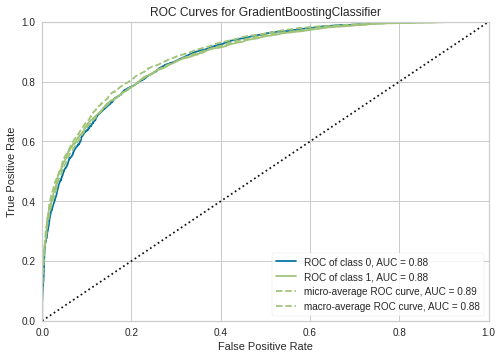

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(gbc, plot = 'auc')

#### Precision-Recall Curve

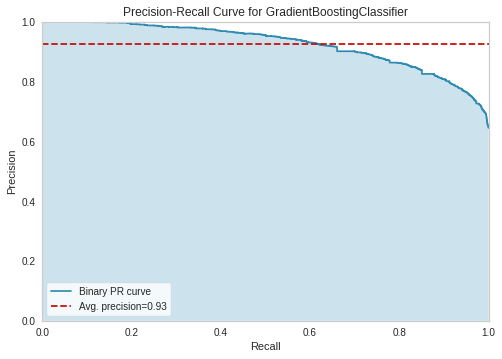

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [31]:
plot_model(gbc, plot = 'pr')

#### Feature Importance Plot

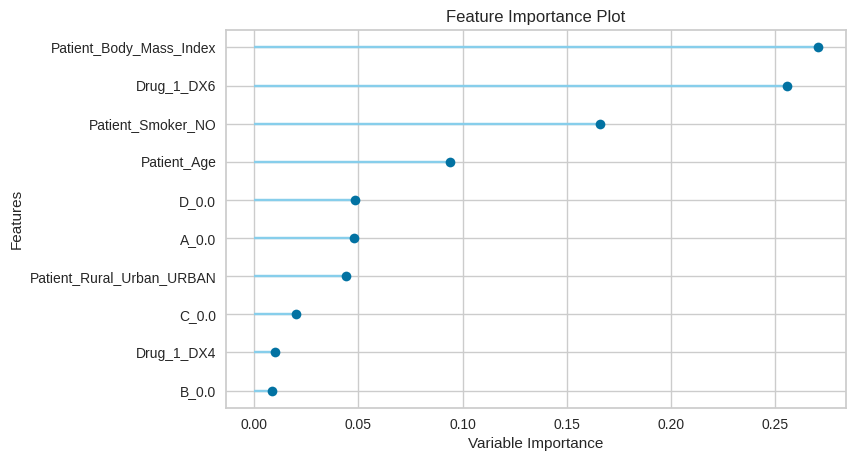

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(gbc, plot='feature')

#### Confusion Matrix

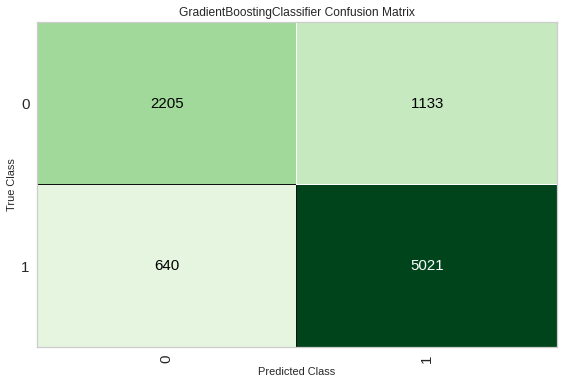

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(gbc, plot = 'confusion_matrix')